# Community Detection

In [1]:
# !pip install python-louvain

In [2]:
from polygraphs.analysis import Processor
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
import seaborn as sns

/Users/prudhvivuda/Documents/polygraphs/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
processor = Processor(["../../CollegeMSG/"], config_check=False)
len(processor.graphs)

340

In [4]:
# picking a graph from the available graphs using indexing
graph = processor.graphs[99]

## Applying Label Propagation

In [5]:
# Apply Label Propagation Algorithm
lp_communities = nx.algorithms.community.label_propagation_communities(graph)

# Convert generator output to dictionary: {node: community_id}
community_mapping = {}
for community_id, nodes in enumerate(lp_communities):
    for node in nodes:
        community_mapping[node] = community_id

In [6]:
set(community_mapping.values())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [7]:
# Convert community mapping to a DataFrame
lp_community_df = pd.DataFrame.from_dict(community_mapping, orient="index", columns=["community"])
lp_community_df.reset_index(inplace=True)
lp_community_df.rename(columns={"index": "node"}, inplace=True)

In [8]:
lp_community_df.to_csv("label_propagation_community_assignments.csv", index=False)

/var/folders/1c/f0l1c8xj21b5_d53qldvsm200000gn/T/ipykernel_11649/85966643.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab20', len(unique_communities))  # Distinct colors for communities
/Users/prudhvivuda/Documents/polygraphs/.venv/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


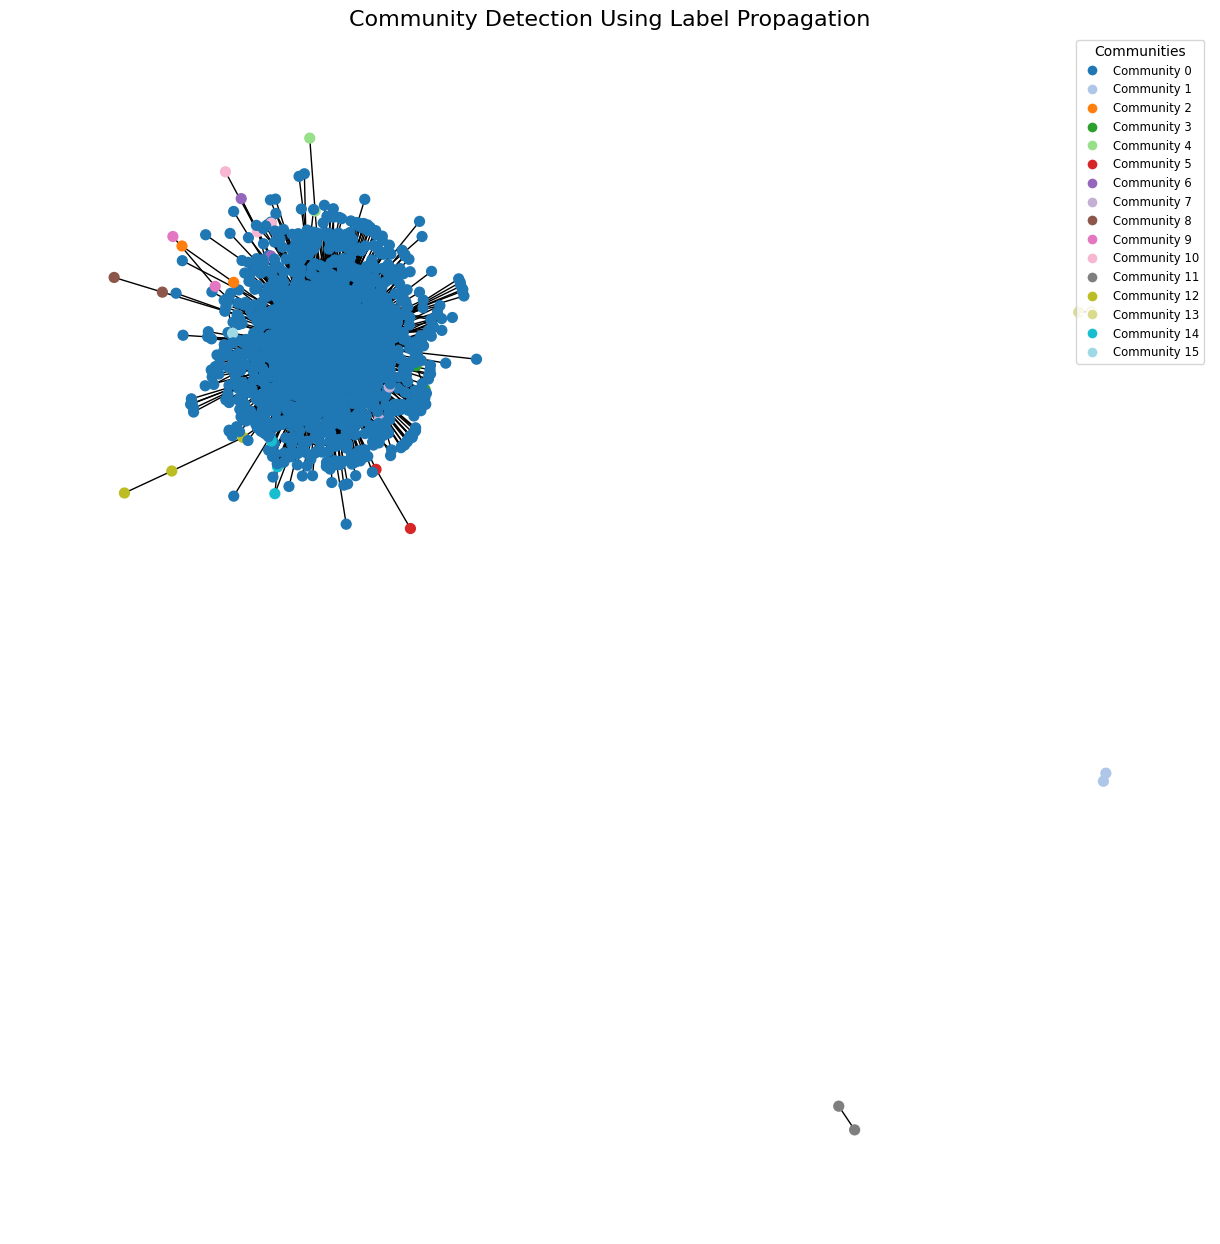

In [9]:
# Extract unique communities and assign colors
unique_communities = set(community_mapping.values())
color_map = cm.get_cmap('tab20', len(unique_communities))  # Distinct colors for communities
community_colors = {community: color_map(i) for i, community in enumerate(unique_communities)}

# Map node colors to their respective communities
node_colors = [community_colors[community_mapping[node]] for node in graph.nodes()]

# Plot the graph with community-based coloring
plt.figure(figsize=(12, 12))
nx.draw(
    graph,
    node_color=node_colors,
    with_labels=False,
    node_size=50,
    cmap=plt.cm.tab20
)

# Add legend for communities
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=community_colors[c], markersize=8, label=f"Community {c}")
    for c in unique_communities
]
plt.legend(
    handles=legend_elements,
    title="Communities",
    loc="upper right",
    fontsize='small',
    title_fontsize='medium'
)

# Final touches for the plot
plt.title("Community Detection Using Label Propagation", fontsize=16)
plt.show()


 INFO matplotlib.category> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
 INFO matplotlib.category> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


/var/folders/1c/f0l1c8xj21b5_d53qldvsm200000gn/T/ipykernel_11649/2846501175.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=community_sizes.index, y=community_sizes.values, palette="viridis")


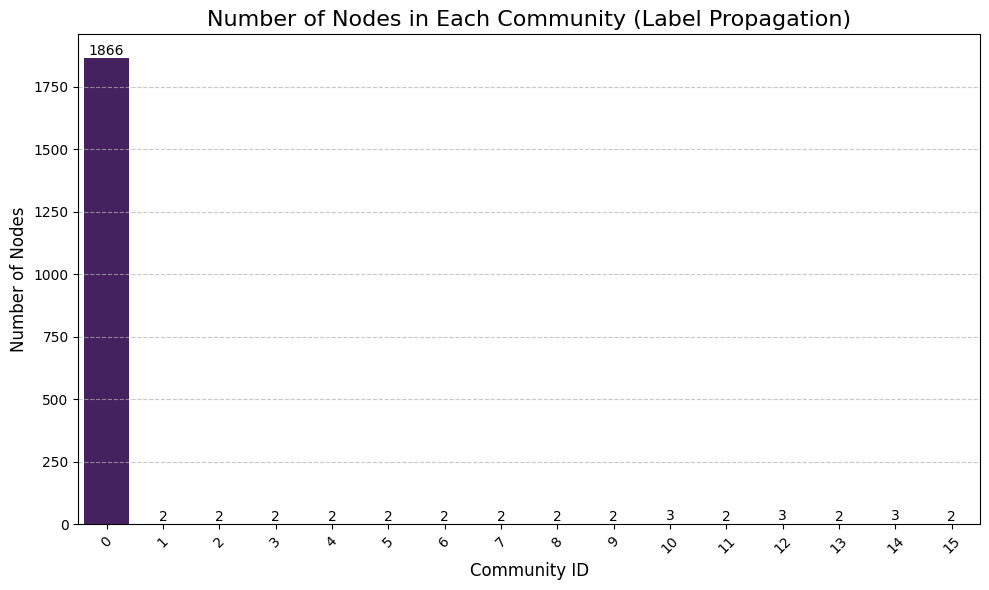

In [10]:
# Count the number of nodes in each community
community_sizes = lp_community_df["community"].value_counts().sort_index()

# Plot a histogram of community sizes
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=community_sizes.index, y=community_sizes.values, palette="viridis")

# Add counts on top of each bar
for bar, count in zip(barplot.patches, community_sizes.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,  # Position the text
             str(count), ha='center', va='bottom', fontsize=10, color='black')

# Add titles and labels
plt.title("Number of Nodes in Each Community (Label Propagation)", fontsize=16)
plt.xlabel("Community ID", fontsize=12)
plt.ylabel("Number of Nodes", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


## Applying Louvain Algorithm

In [11]:
import community as community_louvain

# Compute the best partition (Louvain method)
louvain_communities = community_louvain.best_partition(graph)
louvain_community_mapping = louvain_communities  

In [12]:
set(louvain_communities.values())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [13]:
# Create a DataFrame
louvain_community_df = pd.DataFrame({
    "node": list(louvain_communities.keys()),
    "community": list(louvain_communities.values())
})

louvain_community_df.to_csv("louvain_community_assignments.csv", index=False)

/var/folders/1c/f0l1c8xj21b5_d53qldvsm200000gn/T/ipykernel_11649/2879406688.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab20', len(unique_communities))  # Get distinct colors
/Users/prudhvivuda/Documents/polygraphs/.venv/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


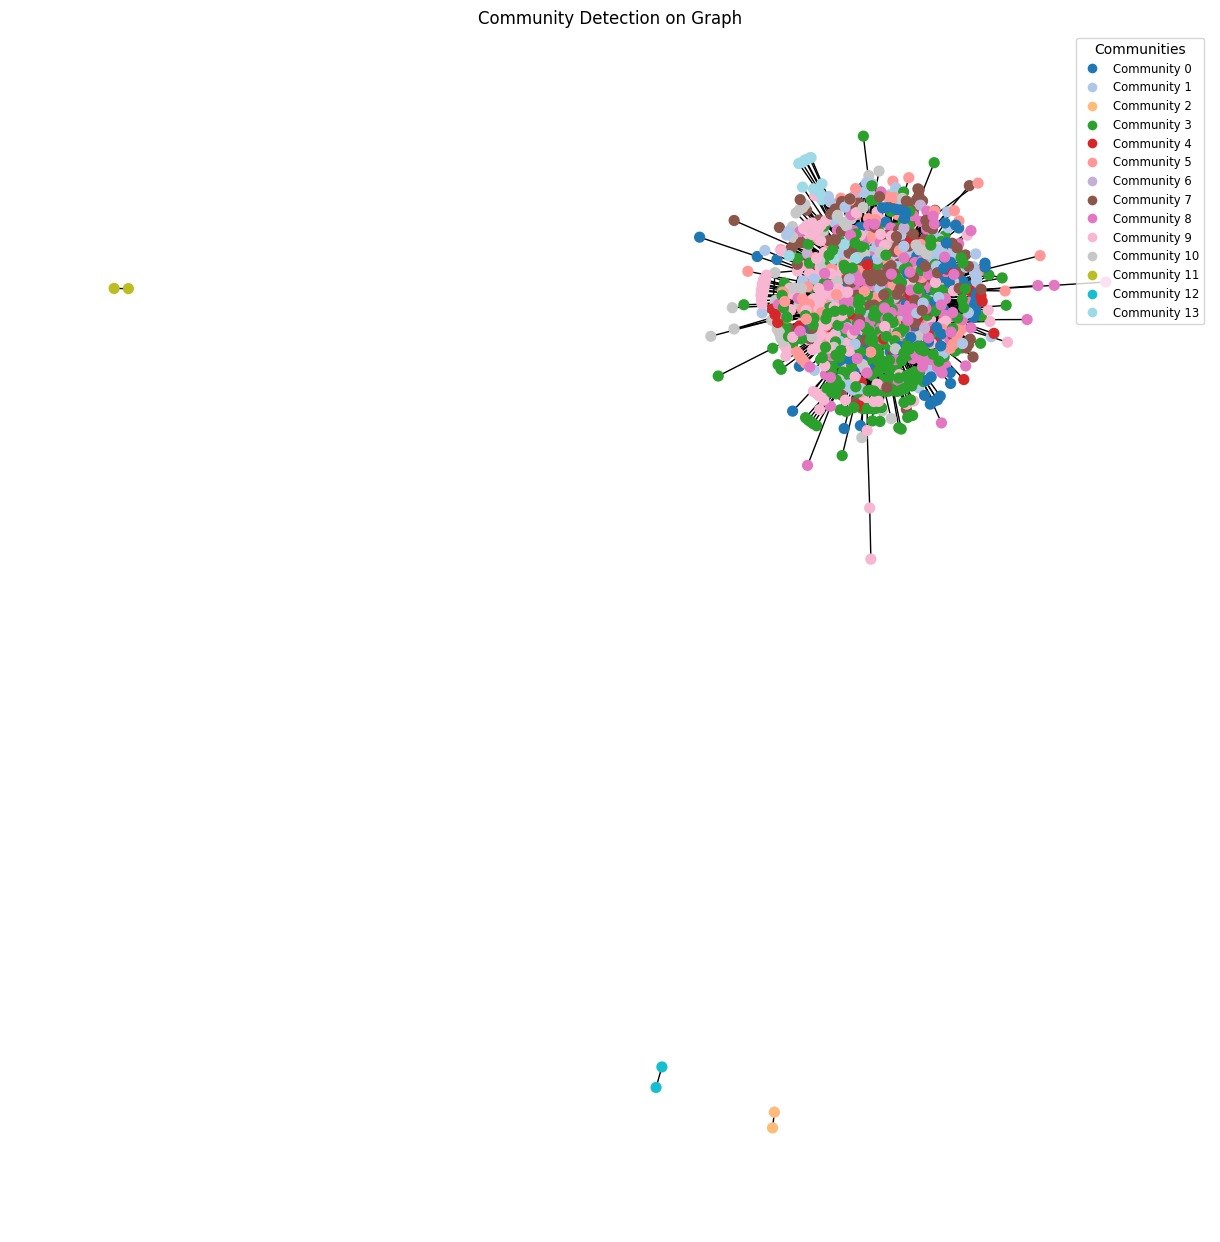

In [14]:
# Generate community colors
unique_communities = list(set(louvain_communities.values()))
color_map = cm.get_cmap('tab20', len(unique_communities))  # Get distinct colors
community_colors = {community: color_map(i) for i, community in enumerate(unique_communities)}

# Assign node colors based on their communities
node_colors = [community_colors[louvain_communities[node]] for node in graph.nodes()]

# Plot the graph
plt.figure(figsize=(12, 12))
nx.draw(
    graph,
    node_color=node_colors,
    with_labels=False,
    node_size=50,
    cmap=plt.cm.tab20
)

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=community_colors[c], markersize=8, label=f"Community {c}")
    for c in unique_communities
]
plt.legend(
    handles=legend_elements,
    title="Communities",
    loc="upper right",
    fontsize='small',
    title_fontsize='medium'
)

plt.title("Community Detection on Graph")
plt.show()

 INFO matplotlib.category> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
 INFO matplotlib.category> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


/var/folders/1c/f0l1c8xj21b5_d53qldvsm200000gn/T/ipykernel_11649/2855929511.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=louvain_community_sizes.index, y=louvain_community_sizes.values, palette="coolwarm")


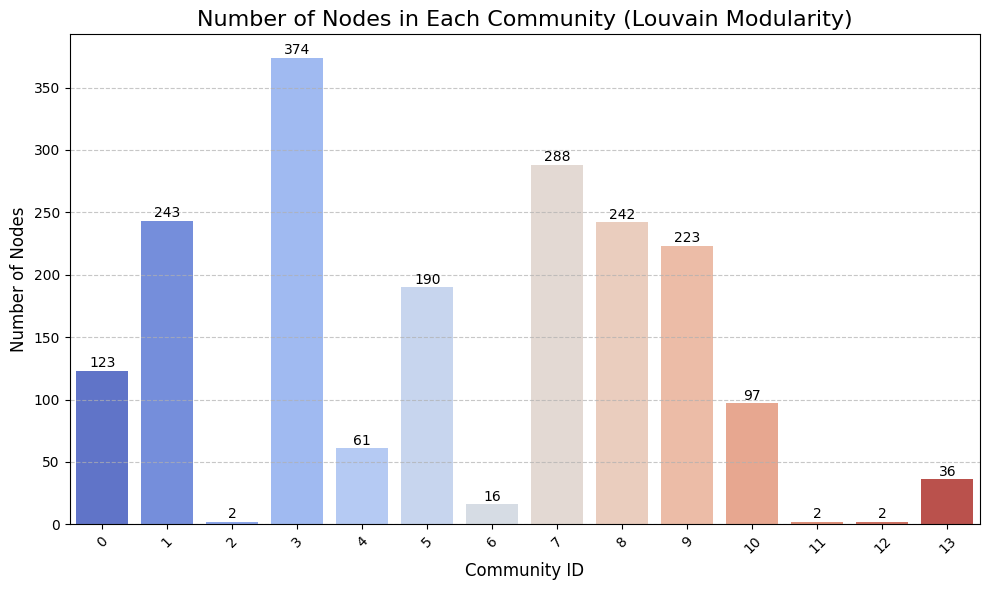

In [15]:
# Count the number of nodes in each Louvain community
louvain_community_sizes = pd.Series(louvain_community_mapping).value_counts().sort_index()

# Plot a histogram of Louvain community sizes
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=louvain_community_sizes.index, y=louvain_community_sizes.values, palette="coolwarm")

# Add counts on top of each bar
for bar, count in zip(barplot.patches, louvain_community_sizes.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,  # Position the text
             str(count), ha='center', va='bottom', fontsize=10, color='black')

# Add titles and labels
plt.title("Number of Nodes in Each Community (Louvain Modularity)", fontsize=16)
plt.xlabel("Community ID", fontsize=12)
plt.ylabel("Number of Nodes", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()